In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
data_complete = pd.merge(mouse_drug_data, clinical_data,how = "outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint  

grouped_by_drug_time = data_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_drug_time = grouped_by_drug_time.mean()
# Convert to DataFrame
df_avg_drug_time = pd.DataFrame(avg_drug_time).reset_index()
# Preview DataFrame
df_avg_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_drug_time = grouped_by_drug_time.sem()

# Convert to DataFrame
df_se_drug_time = pd.DataFrame(se_drug_time).reset_index()


# Preview DataFrame
df_se_drug_time.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

pivot_avg_df = df_avg_drug_time.pivot(index ="Timepoint",columns='Drug',values='Tumor Volume (mm3)')
pivot_df_se_drug_time = df_se_drug_time.pivot(index ="Timepoint",columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
pivot_df_se_drug_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


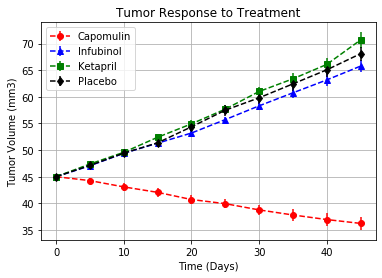

In [5]:
# Generate the Plot (with Error Bars)

drug_list = ["Capomulin", "Infubinol", "Ketapril","Placebo"]
shape_list = ["o","^","s","d"]
colors = ["red","blue","green","black"]


for i in np.arange(0,4,1):
    plt.errorbar(x=pivot_avg_df.index,y=pivot_avg_df[drug_list[i]],
                 marker = shape_list[i],color = colors[i],yerr = pivot_df_se_drug_time[drug_list[i]],
                 linestyle="--", label =drug_list[i])


plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("../TumerResponse.png")

#Show the figure
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_by_drug_time = data_complete.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met = met_by_drug_time.mean()

# Convert to DataFrame
df_avg_met = pd.DataFrame(avg_met).reset_index()
# Preview DataFrame
df_avg_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_by_drug_time = data_complete.groupby(['Drug','Timepoint'])['Metastatic Sites']
se_met = met_by_drug_time.sem()
# Convert to DataFrame
df_se_met = pd.DataFrame(se_met).reset_index()
# Preview DataFrame
df_se_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met = df_avg_met.pivot(index ="Timepoint",columns = "Drug",values = "Metastatic Sites")
# Preview that Reformatting worked
pivot_met.head()
pivot_df_se_met = df_se_met.pivot(index ="Timepoint",columns = "Drug",values = "Metastatic Sites")
pivot_met.head()
pivot_df_se_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


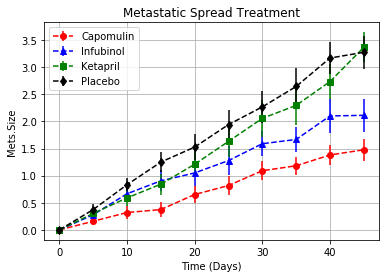

In [9]:
# Generate the Plot (with Error Bars)

drug_list = ["Capomulin", "Infubinol", "Ketapril","Placebo"]
shape_list = ["o","^","s","d"]
colors = ["red","blue","green","black"]
se = df_se_drug_time

for i in np.arange(0,4,1):
        plt.errorbar(x=pivot_met.index,y=pivot_met[drug_list[i]],marker = shape_list[i],color = colors[i],yerr = pivot_df_se_met[drug_list[i]],linestyle="--", label = drug_list[i])


plt.title('Metastatic Spread Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mets.Size')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("../MetSiteResponse.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_drug_time = data_complete.groupby(['Drug','Timepoint'])['Mouse ID']
mice_count = mice_drug_time.count()
# Convert to DataFrame
df_mice_count = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
df_mice_count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [47]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot_df = df_mice_count.pivot(index="Timepoint", columns ="Drug", values = "Mouse ID")
mice_pivot_df = pd.DataFrame(mice_pivot_df)

# Preview the Data Frame
mice_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


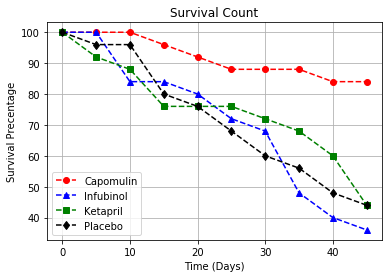

In [147]:
# Generate the Plot (Accounting for percentages)
drug_list = ["Capomulin", "Infubinol", "Ketapril","Placebo"]
shape_list = ["o","^","s","d"]
colors = ["red","blue","green","black"]

for i in np.arange(0,4,1):
        plt.errorbar(x=mice_pivot_df.index,y=(mice_pivot_df[drug_list[i]]/25)*100,
                     marker = shape_list[i],color = colors[i],yerr = None,linestyle="--", label = drug_list[i])


plt.title('Survival Count')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Precentage')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("../survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [148]:
# Calculate the percent changes for each drug
Drugs = mice_pivot_df.columns


l = len(pivot_avg_df)-1

for_Changes_df = pivot_avg_df.reset_index()

changes = pd.DataFrame(Drugs).set_index("Drug")
changes["change"] = [((for_Changes_df[x][l]/for_Changes_df[x][0])-1)*100 for x in Drugs]

changes["change"] = changes["change"].astype(float)

# Display the data to confirm
changes

,change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


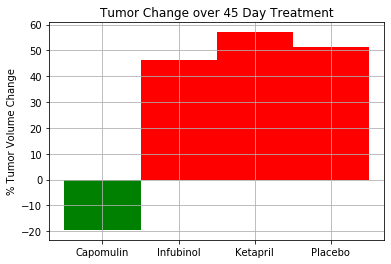

In [248]:
# Store all Relevant Percent Changes into a Tuple

t = tuple(changes)


# Splice the data between passing and failing drugs
passing = (changes["change"] <0)

# Orient widths. Add labels, tick marks, etc.
height = []
x = pd.DataFrame(drug_list).set_index(0)
for i in drug_list:
    height.append(changes.loc[i])
    
height = pd.DataFrame(height)

bar_graph = plt.bar(x.index, height["change"], color=passing.map({True:'g',False :'r'}), width=-1)
plt.grid()
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')


# Save the Figure
plt.savefig("../changes.png")

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/change.png)

In [39]:
#Insights:
#1: It seems that the drug Capomulin is the most favorable as it has reduced the tumor volume by almost 20% in 45 days
#2: Even though the sample size is fairly small (1906), the standard error of the mean accross all four drugs and especially Capomulin is small in the begining but larger at the end of 45 days wich indicates absence of irruglations in the data at the start of the treatment
#3: In general, all 4 drugs have not succedeed in stopping or slowing the spread of cancer within the 45 days period
#4: Under the drugs Infubinol, Katapril and Placebo, the tumor volume has increased but we cannot conculde if they were the cause of this increase or if they have actually slowed down the tumor duo to a lack of an uncontrolled group to compare with